### Some default plot tests. Remove later.

In [1]:
%matplotlib notebook
import os
import wave
import numpy as np
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# (Replace self_ with self. in classes later.) 
self_wave_file_name = 'in_data/myotis_plecotus_eptesicus.wav'

In [3]:
self_wave_file = wave.open(self_wave_file_name, 'rb')
#
self_wave_sampling_rate = self_wave_file.getframerate()
self_wave_channels = self_wave_file.getnchannels()
print(str(self_wave_sampling_rate))
print(str(self_wave_channels))
#
self_wave_buffer = self_wave_file.readframes(-1)
print('Length of buffer: ' + str(len(self_wave_buffer)))
#
self_wave_file.close()

38400
1
Length of buffer: 18432000


In [4]:
self_wave_signal  = np.fromstring(self_wave_buffer, dtype=np.int16) # To ndarray.
self_wave_signal = self_wave_signal / 32768.0 # Transform to intervall 0-1.
#
self_wave_signal_length = len(self_wave_signal)
self_wave_signal_length_s = self_wave_signal_length/self_wave_sampling_rate

In [5]:
self_wave_signal

array([ 0.00146484,  0.00112915, -0.0005188 , ...,  0.00045776,
        0.00027466, -0.00131226])

In [6]:
x_time =  np.arange(0, self_wave_signal_length_s, self_wave_signal_length_s/self_wave_signal_length)
print(str(len(x_time)))


9216000


<IPython.core.display.Javascript object>


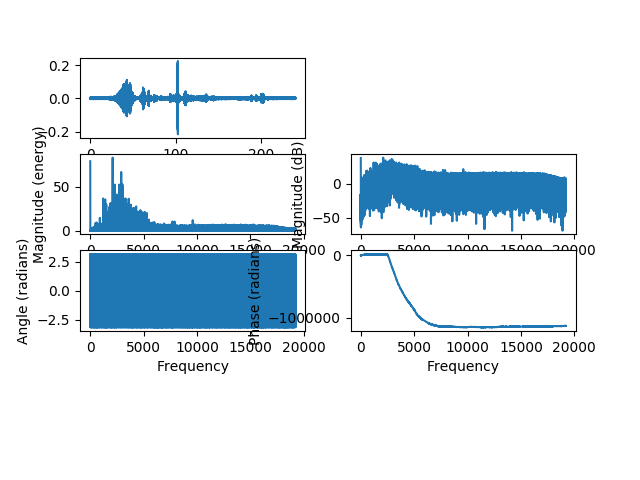

(array([  0.00000000e+00,   3.13855852e+00,   5.87732705e+00, ...,
         -1.13324192e+06,  -1.13324494e+06,  -1.13324787e+06]),
 array([  0.00000000e+00,   4.16666667e-03,   8.33333333e-03, ...,
          1.91999917e+04,   1.91999958e+04,   1.92000000e+04]),
 <matplotlib.lines.Line2D at 0x7f6052426c50>)

In [7]:
plt.subplot(4, 2, 1)
plt.plot(x_time, self_wave_signal)

plt.subplot(4, 2, 3)
plt.magnitude_spectrum(self_wave_signal, Fs=self_wave_sampling_rate)

plt.subplot(4, 2, 4)
plt.magnitude_spectrum(self_wave_signal, Fs=self_wave_sampling_rate, scale='dB')

plt.subplot(4, 2, 5)
plt.angle_spectrum(self_wave_signal, Fs=self_wave_sampling_rate)

plt.subplot(4, 2, 6)
plt.phase_spectrum(self_wave_signal, Fs=self_wave_sampling_rate)

#plt.show()

In [ ]:
ax1 = plt.subplot(4, 2, 7)
plt.plot(x_time, self_wave_signal)
plt.subplot(4, 2, 8, sharex=ax1
Pxx, freqs, bins, im = plt.specgram(self_wave_signal, NFFT=2048, Fs=self_wave_sampling_rate, noverlap=500)
plt.show()


In [ ]:
np.random.seed(0)

dt = 0.01
Fs = 1/dt
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t/0.05)

cnse = np.convolve(nse, r)*dt
cnse = cnse[:len(t)]
s = 0.1*np.sin(2*np.pi*t) + cnse

plt.subplot(3, 2, 1)
plt.plot(t, s)

plt.subplot(3, 2, 3)
plt.magnitude_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 4)
plt.magnitude_spectrum(s, Fs=Fs, scale='dB')

plt.subplot(3, 2, 5)
plt.angle_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 6)
plt.phase_spectrum(s, Fs=Fs)

plt.show()


In [ ]:
self_wave_file = wave.open(self_wave_file_name, 'r')
frames = self_wave_file.readframes(-1)
sound_info = pylab.fromstring(frames, 'Int16')
self_sampling_rate = self_wave_file.getframerate()
self_channels = self_wave_file.getnchannels()
self_wave_file.close()
#
print(len(frames))
print(str(self_sampling_rate))
print(str(self_channels))

#
pylab.figure(num=None, figsize=(19, 12))
pylab.subplot(111)
pylab.title('spectrogram of %r' % self_wave_file)
pylab.specgram(sound_info, Fs=self_sampling_rate, noverlap=100000)
#

pylab.savefig('out_data/spectrogram.png')
#
#pylab.show()